In [1]:
import pandas as pd

data = pd.read_csv('../../../../BTC-USD.csv')

In [2]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-11,8585.262695,8721.780273,8316.181641,8321.756836,8321.756836,19604381101
1,2019-10-12,8315.665039,8415.242188,8313.340820,8336.555664,8336.555664,14532641605
2,2019-10-13,8336.902344,8470.988281,8276.612305,8321.005859,8321.005859,13808286059
3,2019-10-14,8320.832031,8390.208984,8284.130859,8374.686523,8374.686523,15151387859
4,2019-10-15,8373.458008,8410.714844,8182.706543,8205.369141,8205.369141,15220412632
...,...,...,...,...,...,...,...
1091,2022-10-06,20161.039063,20408.392578,19900.087891,19955.443359,19955.443359,34711412966
1092,2022-10-07,19957.558594,20041.085938,19395.792969,19546.849609,19546.849609,29227315390
1093,2022-10-08,19546.328125,19601.695313,19299.414063,19416.568359,19416.568359,16437423167
1094,2022-10-09,19417.478516,19542.539063,19349.259766,19446.425781,19446.425781,16837262532


In [3]:
PERCOBAAN = 15
EPOUCH = 100
LEARNING_RATE = 0.01
HIDDEN_LAYER = 2
jumlahNeuron = [50,75]

if HIDDEN_LAYER != len(jumlahNeuron):
    print("ERROR hidden layer dan jumlah neuron tidak sesuai")

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

data = data[['Date','Close']]
data['Date'] = data['Date'].apply(str_to_datetime)
data.index = data.pop('Date')
data

C:\Users\F4ray\AppData\Local\Temp\ipykernel_23932\4017773856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(str_to_datetime)


,Close
Date,
2019-10-11,8321.756836
2019-10-12,8336.555664
2019-10-13,8321.005859
2019-10-14,8374.686523
2019-10-15,8205.369141
...,...
2022-10-06,19955.443359
2022-10-07,19546.849609
2022-10-08,19416.568359


In [5]:
df_len = len(data)
split_index = int(df_len * 0.8)
training_data = data[:split_index]
test_data = data[split_index:] 

In [6]:
print(training_data.shape)
training_data

(876, 1)


,Close
Date,
2019-10-11,8321.756836
2019-10-12,8336.555664
2019-10-13,8321.005859
2019-10-14,8374.686523
2019-10-15,8205.369141
...,...
2022-02-28,43193.234375
2022-03-01,44354.636719
2022-03-02,43924.117188


In [7]:
print(test_data.shape)
test_data

(220, 1)


,Close
Date,
2022-03-05,39400.585938
2022-03-06,38419.984375
2022-03-07,38062.039063
2022-03-08,38737.269531
2022-03-09,41982.925781
...,...
2022-10-06,19955.443359
2022-10-07,19546.849609
2022-10-08,19416.568359


In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(training_data)

In [9]:
time_steps=7
x_train = []
y_train = []
for i in range(time_steps, train_scaled.shape[0]):
    x_train.append(train_scaled[i - time_steps:i])
    y_train.append(train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

total_data = pd.concat((training_data, test_data), axis=0)
inputs = total_data[len(total_data) - len(test_data) - time_steps:]
test_scaled = scaler.fit_transform(inputs)

In [10]:
print(train_scaled.shape)
# train_scaled

(876, 1)


In [11]:
print(test_scaled.shape)
# test_scaled

(227, 1)


In [12]:
print(x_train.shape)
# x_train

(869, 7, 1)


In [13]:
x_test = []
y_test = []
for i in range(time_steps, test_scaled.shape[0]):
    x_test.append(test_scaled[i - time_steps:i])
    y_test.append(test_scaled[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)
print(training_data.shape, test_data.shape)

(869, 7, 1) (869,)
(220, 7, 1) (220,)
(876, 1) (220, 1)


In [15]:
print(test_data.index[0])

2022-03-05 00:00:00


plotting Data and Histogram


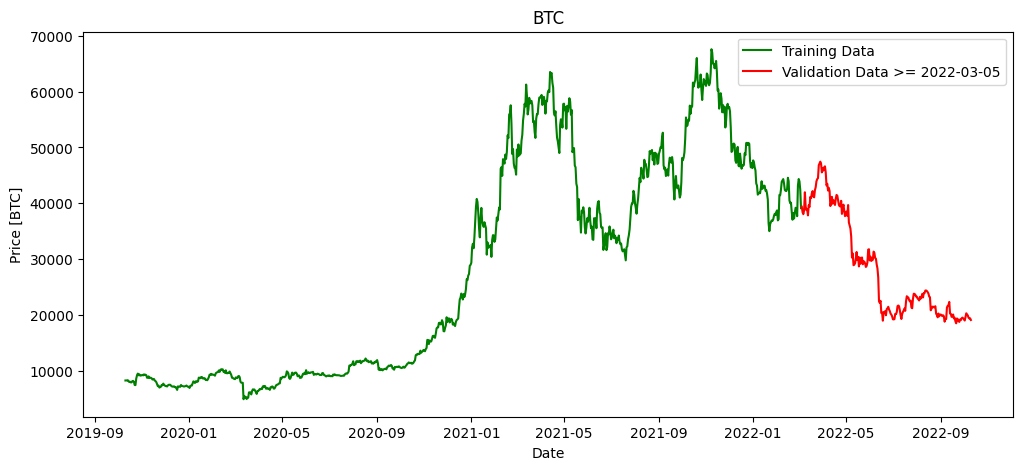

In [16]:
import matplotlib.pyplot as plt
print("plotting Data and Histogram")
validation_date = test_data.index[0]
plt.figure(figsize=(12, 5))
plt.plot(training_data.Close, color='green')
plt.plot(test_data.Close, color='red')
plt.ylabel('Price [' + "BTC" + ']')
plt.xlabel("Date")
plt.legend(["Training Data", "Validation Data >= " + validation_date.strftime("%Y-%m-%d")])
plt.title("BTC")
# plt.savefig(os.path.join(self.project_folder, self.short_name.strip().replace('.', '') + '_price.png'))

# fig, ax = plt.subplots()
# training_data.hist(ax=ax)
# fig.savefig(os.path.join(self.project_folder, self.short_name.strip().replace('.', '') + '_hist.png'))

plt.pause(0.001)
plt.show(block=True)

In [17]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import backend as K
from keras.losses import mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

defined_metrics = [
                    tf.keras.metrics.RootMeanSquaredError(
                    name='root_mean_squared_error', dtype=None
                    ),
                    tf.keras.metrics.MeanAbsolutePercentageError(
                    name='mean_absolute_percentage_error', dtype=None
                    )
                    ]


model=Sequential()
if HIDDEN_LAYER > 1 :
    model.add(LSTM(jumlahNeuron[0],return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
    for i in range(1, len(jumlahNeuron)):
        if i == len(jumlahNeuron) - 1:
            model.add(LSTM(jumlahNeuron[i]))
        else:
            model.add(LSTM(jumlahNeuron[i],return_sequences=True))
else:
    model.add(LSTM(jumlahNeuron[0],return_sequences=False,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(loss=root_mean_squared_error,optimizer=optimizer)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 75)                37800     
                                                                 
 dense (Dense)               (None, 1)                 76        
                                                                 
Total params: 48,276
Trainable params: 48,276
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=EPOUCH,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 4s 73ms/step - loss: 0.1173 - val_loss: 0.0517
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0382 - val_loss: 0.0439
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0330 - val_loss: 0.0424
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0258 - val_loss: 0.0576
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0304 - val_loss: 0.0372
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0254 - val_loss: 0.0385
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0239 - val_loss: 0.0376
Epoch 8/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0208 - val_loss: 0.0364
Epoch 9/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0217 - val_loss: 0.0347
Epoch 10/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0192 - val_loss: 0.0386

In [20]:
test_data

,Close
Date,
2022-03-05,39400.585938
2022-03-06,38419.984375
2022-03-07,38062.039063
2022-03-08,38737.269531
2022-03-09,41982.925781
...,...
2022-10-06,19955.443359
2022-10-07,19546.849609
2022-10-08,19416.568359


In [21]:
test_predictions_baseline = model.predict(x_test)
test_predictions_baseline = scaler.inverse_transform(test_predictions_baseline)
test_predictions_baseline = pd.DataFrame(test_predictions_baseline)
test_predictions_baseline

7/7 [==============================] - 1s 4ms/step


,0
0,39259.910156
1,39223.183594
2,38216.742188
3,38025.238281
4,38624.203125
...,...
215,20134.988281
216,19858.982422
217,19413.880859
218,19280.960938


In [22]:
test_predictions_baseline.rename(columns={0: "BTC" + '_predicted'}, inplace=True)
price_predicted = test_predictions_baseline.round(decimals=0)
price_predicted.index = test_data.index

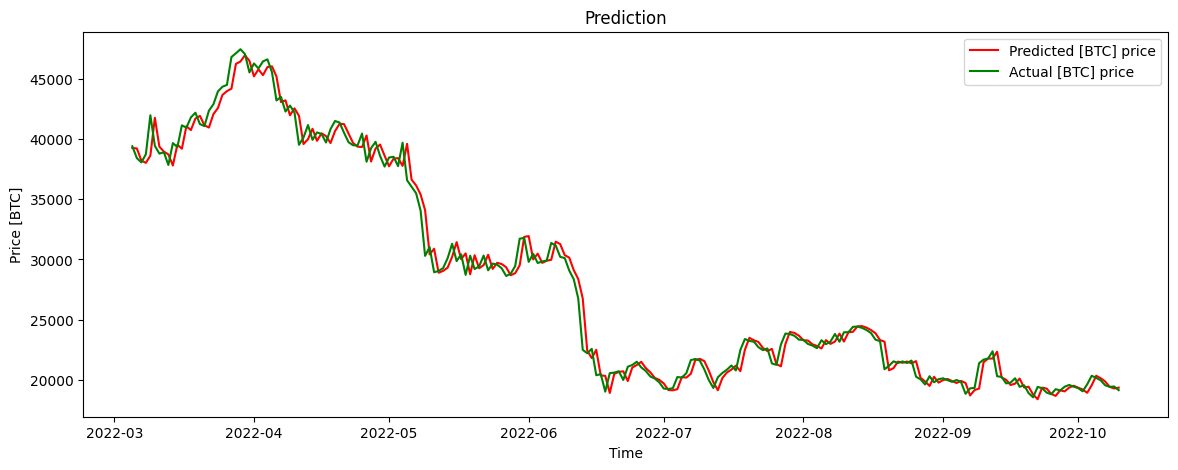

In [23]:
plt.figure(figsize=(14, 5))
plt.plot(price_predicted["BTC" + '_predicted'], color='red', label='Predicted [' + "BTC" + '] price')
plt.plot(test_data.Close, color='green', label='Actual [' + "BTC" + '] price')
plt.xlabel('Time')
plt.ylabel('Price [' + "BTC" + ']')
plt.legend()
plt.title('Prediction')
# plt.savefig(os.path.join(self.project_folder, self.short_name.strip().replace('.', '') + '_prediction.png'))
plt.pause(0.001)
plt.show(block=True)

In [24]:
npTestData= test_data.to_numpy()
# npTestData
npPredictedData = test_predictions_baseline.to_numpy()

In [25]:
def calculate_rmse(actual, prediction):
    rmse = np.sqrt(np.mean((actual - prediction) ** 2))
    return rmse

In [26]:
pdTestData = pd.DataFrame(npTestData)
pdPredictedData = pd.DataFrame(npPredictedData)

frames = [pdTestData, pdPredictedData]
  
pdCompare = pd.concat(frames,axis=1, join='inner')
pdCompare.set_axis(["actual_price", "predicted_price"], axis="columns", inplace=True)
pdCompare.index = test_data.index
pdCompare

C:\Users\F4ray\AppData\Local\Temp\ipykernel_23932\1734939171.py:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  pdCompare.set_axis(["actual_price", "predicted_price"], axis="columns", inplace=True)


,actual_price,predicted_price
Date,,
2022-03-05,39400.585938,39259.910156
2022-03-06,38419.984375,39223.183594
2022-03-07,38062.039063,38216.742188
2022-03-08,38737.269531,38025.238281
2022-03-09,41982.925781,38624.203125
...,...,...
2022-10-06,19955.443359,20134.988281
2022-10-07,19546.849609,19858.982422
2022-10-08,19416.568359,19413.880859


In [27]:
from sklearn.metrics import mean_squared_error 
rmse = mean_squared_error(pdCompare.actual_price, pdCompare.predicted_price, squared = False)
rmse

984.2135219660227

In [28]:
pdCompare

,actual_price,predicted_price
Date,,
2022-03-05,39400.585938,39259.910156
2022-03-06,38419.984375,39223.183594
2022-03-07,38062.039063,38216.742188
2022-03-08,38737.269531,38025.238281
2022-03-09,41982.925781,38624.203125
...,...,...
2022-10-06,19955.443359,20134.988281
2022-10-07,19546.849609,19858.982422
2022-10-08,19416.568359,19413.880859


In [29]:
import numpy as np 
import sklearn.metrics as metrics
d = pdCompare['actual_price'] - pdCompare['predicted_price']
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((pdCompare['actual_price']-np.mean(pdCompare['actual_price']))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 684.07634941875
MSE: 968676.2568207626
RMSE: 984.2135219660227
R-Squared: 0.9881357128503062


In [30]:
pdCompare["APE"] = np.abs(pdCompare['actual_price']-pdCompare['predicted_price'])/pdCompare['actual_price']*100
pdCompare["SE"] = np.square(pdCompare['actual_price']-pdCompare['predicted_price']) 

In [31]:

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_manual = rmse(pdCompare['actual_price'], pdCompare['predicted_price'])
mape_manual = mape(pdCompare['actual_price'], pdCompare['predicted_price'])

In [32]:
pdCompare

,actual_price,predicted_price,APE,SE
Date,,,,
2022-03-05,39400.585938,39259.910156,0.357040,1.978968e+04
2022-03-06,38419.984375,39223.183594,2.090577,6.451290e+05
2022-03-07,38062.039063,38216.742188,0.406450,2.393306e+04
2022-03-08,38737.269531,38025.238281,1.838104,5.069885e+05
2022-03-09,41982.925781,38624.203125,8.000211,1.128102e+07
...,...,...,...,...
2022-10-06,19955.443359,20134.988281,0.899729,3.223638e+04
2022-10-07,19546.849609,19858.982422,1.596845,9.742689e+04
2022-10-08,19416.568359,19413.880859,0.013841,7.222654e+00


In [33]:
strNeuron = "-".join(map(str, jumlahNeuron))
strNeuron

'50-75'

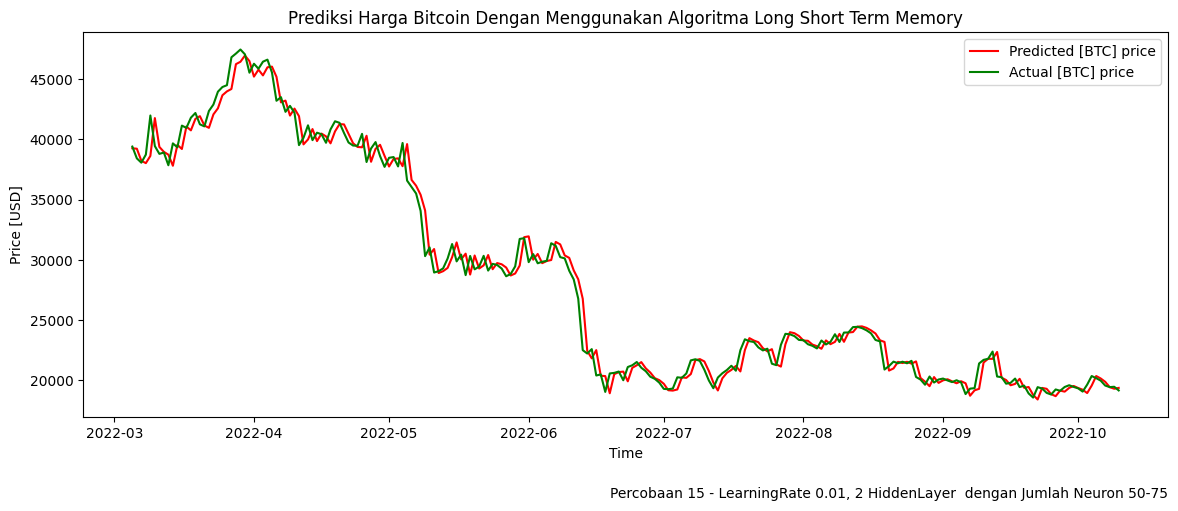

MSE: 968676.2568207626
RMSE: 984.2135219660227
MAPE: 2.4218852739740893


In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(pdCompare.predicted_price, color='red', label='Predicted [' + "BTC" + '] price')
plt.plot(pdCompare.actual_price, color='green', label='Actual [' + "BTC" + '] price')
plt.xlabel('Time')
plt.ylabel('Price [' + "USD" + ']')
plt.legend()
plt.title('Prediksi Harga Bitcoin Dengan Menggunakan Algoritma Long Short Term Memory')
plt.savefig('Percobaan'+str(PERCOBAAN)+'-LearningRate'+str(LEARNING_RATE)+'-HiddenLayer'+str(HIDDEN_LAYER)+'-Neuron'+strNeuron+'.png')
plt.annotate('Percobaan '+str(PERCOBAAN)+' - LearningRate '+str(LEARNING_RATE)+', '+str(HIDDEN_LAYER)+' HiddenLayer '+' dengan Jumlah Neuron '+strNeuron,
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)
plt.pause(0.001)
plt.show(block=True)

print("MSE:", mse_f)
print("RMSE:", rmse_manual)
print("MAPE:", mape_manual)

In [35]:
pdCompare.to_csv('Percobaan5-LearningRate0.1-HiddenLayer2-Neuron50-75.csv')